In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [27]:
data = {
    "1": ['x11', 'x21', 'x31', 'xn1'],
    "2": ['x12', 'x22', 'x32', 'xn2'],
    "3": ['x13', 'x23', 'x33', 'xn3'],
    "n": ['x1m', 'x2m', 'x3m', 'xnm'],
    "target": ['y1', 'y2', 'y3', 'yn']
}

In [28]:
df = pd.DataFrame(data)

In [29]:
df

,1,2,3,n,target
0,x11,x12,x13,x1m,y1
1,x21,x22,x23,x2m,y2
2,x31,x32,x33,x3m,y3
3,xn1,xn2,xn3,xnm,yn


## let ' s assume we have those numbers or rows and  columns above us and the target columns 

now we need to predict the first row which is y_hat and so on for all the rows using the Coefficient 

the formula is : 

w1 x11 + w2 x12 + w3 x13 + ...... wm x1m  + w0

where w represent the Coefficient and the x are the features and w0 is the bias

and then we pass it to the sigmoid function 

sigmoid(w1 x11 + w2 x12 + w3 x13 + ...... wm x1m  + w0)

then we just do the same for all the rows 

while doing all of this we get a matrix of y_hat


To calculate the predicted value, denoted as y_hat, 

you need to apply the sigmoid function to a linear combination of the features in the matrix. 

Each feature (x11, x12, etc.) is multiplied by its corresponding weight (w1, w2, etc.) and summed together, including a bias term (w0). 

Additionally, a constant 1 is multiplied by a bias weight (w0). The resulting linear combination is then passed through the sigmoid function.

In summary, the process to obtain y_hat can be described as follows:

* Multiply each feature in the matrix by its corresponding weight.

* Include a bias term (w0) by multiplying a constant 1 by the bias weight.

* Sum all the weighted features and the bias term.

* Apply the sigmoid function to the resulting linear combination.

* This process results in the predicted value, y_hat, which represents the output of the sigmoid function applied to the linear combination of features and weights.


and the end formula will be 

## y_hat = sigmoid(x w) 


### the log_loss for logistic regression

you can check it out on goggle which is very short

https://developers.google.com/machine-learning/crash-course/logistic-regression/model-training

## the log loss function in Matrix form 

If you want the derivation you can check out the images which is in the same folder and it is label with the correct way to read it

## now using this we will apply gradient descent 

where the formula is 

w_new = w_old - learning_rate  delta l / delta w 


"Now, using this formula, we can apply gradient descent to update the weight vector in logistic regression. The updated weight vector, denoted as w_new, is obtained by subtracting the product of the learning rate and the gradients of the log loss function with respect to the weights, delta l / delta w, from the previous weight vector w_old.

In [31]:
from sklearn.datasets import make_classification

x, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

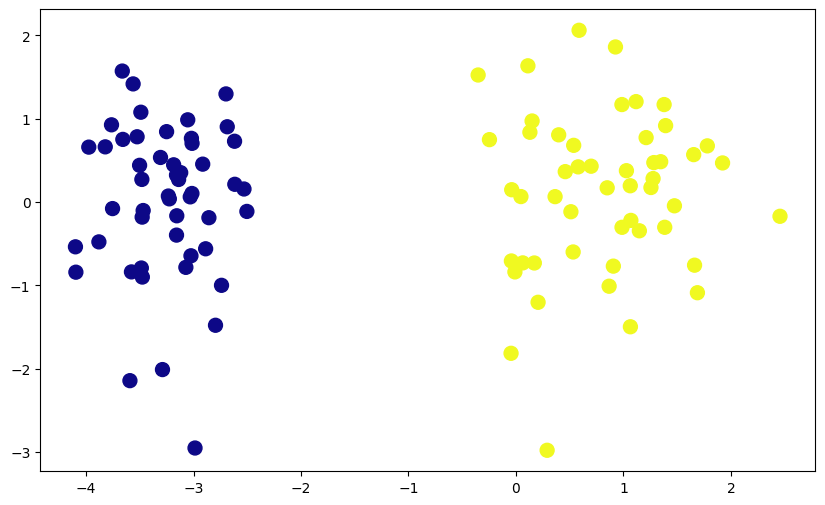

In [32]:


plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='plasma',s=100)

# the target columns or y is 1 or 0  here yellow is 1 and blue is zero

In [33]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(penalty="none" , solver="sag")
model.fit(x , y)

# penalty refers to rugualrization 

# the parameter "solver" in the LogisticRegression constructor refers to 
#the algorithm used to optimize the logistic regression 
#model's parameters during the training process. 
# It determines how the model finds the optimal values for the coefficients (weights) 
#that define the decision boundary.

C:\Users\Win7\100daysofml\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Win7\100daysofml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [34]:
print(model.coef_)
print(model.intercept_)

[[4.86088912 0.22948575]]
[5.81431281]


In [37]:
m1 = -(model.coef_[0][0] / model.coef_[0][1])
b1 =  -(model.intercept_ / model.coef_[0][1])

In [38]:
x_input = np.linspace(-3 , 3 , 100 )
y_input = m1 * x_input + b1 
# which is y = mx + b 

In [53]:
# now lets code the gradient descent

def gd(X,y):
    
    X = np.insert(x,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]
        

In [54]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [55]:
coef_ , intercept_ = gd(x , y)

In [56]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [57]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

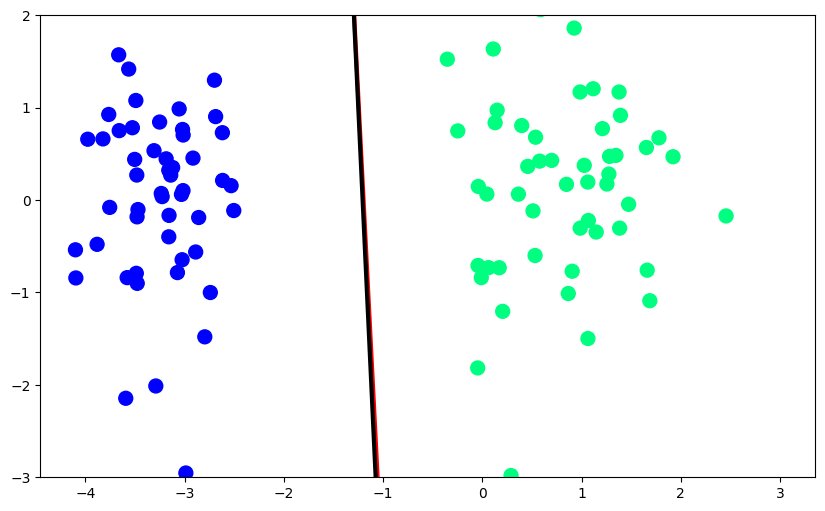

In [58]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

## hey looks like we can replicate the scikit learn logistic regresion class by ourselves

## very fun